In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control

# IDENTIFICACION DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Unidad 1 - Introducción y Conceptos Básicos  

## Modelos matemáticos sistemas LTI  

* Dominio del Tiempo (Ecuaciones diferenciales)
* Dominio Frecuencia (Función de transferencia)
* Modelo en espacio de estados

El modelamiento matemático con base al comportamiento de las variables físicas, permite la obtención de una herramienta de modelamiento siempre y cuando se conozca la información sobre las entradas y salidas del sistema así como de la estructura interna y funcionamiento de la planta a modelar.  

### **Ejemplo CIRCUITO RLC - Serie**  

![RLC - Serie](figuras/RLC.jpg)

* Ecuaciones Diferenciales 

A partir de la Ley de Voltajes de Kirchhoff:

\begin{equation}
\frac{di}{dt} = -\frac{R}{L}i-\frac{v_{c}}{L}+\frac{v}{L}
\end{equation}  

\begin{equation}
\frac{dv_{c}}{dt} = \frac{i}{C}
\end{equation}  

Se observan 2 variables de interés la corriente del inductor y el voltaje del capacitor. La entrada es una fuente de exitación y la salida podría ser una de las 2 variables de interés. Existen otras variables como el voltaje de R y de L, así como los parámetros propios del circuito R, L y C.  

* Función de Transferencia  

\begin{equation}
G(S) = \frac{v_{c}(S)}{v(S)} = \frac{\frac{1}{LC}}{S^{2}+\frac{R}{L}S+\frac{1}{LC}}
\end{equation}  

* Espacio de estados  

$$A = \left [ \matrix{ -\frac{R}{L} & -\frac{1}{L} \\ \frac{1}{C} & 0 } \right ], \; 
B = \left [ \matrix{\frac{1}{L} \\ 0 } \right ], \;
C = \left [ \matrix{0 & 1} \right ], \;
D = 0$$  

Asumiendo parámetros con valores R , C , L 

In [2]:
t, L, R, C = sym.symbols('t L R C', real=True)
v = sym.Function('v')(t)
il = sym.Function('il')(t)
vC = sym.Function('vC')(t)

ode1 = sym.Eq(il.diff(t),(-R/L)*il-vC/L+v/L)
ode1 

In [7]:
ode2 = sym.Eq(vC.diff(t), 1/C*il)
ode2

Tomando las ecuaciones anteriores, se puede implementar un diagrama de bloques en un software apropiado que permita observar el comportamiento de las señares de entrada y salida.

![RLC - Modelo](figuras/rlc_model.png)

Se procede a definir el SS inicializando los parámetros del sistema (conocidos de antemano) - Gss

In [2]:
R = 1;
L = 2;
Co = 1;

A = Matrix([[-R/L,-1/L],[1/Co,0]])
B = Matrix([[1/L],[0]])
C1 = Matrix([[0,1]])
D = 0
Gss = control.ss(A,B,C1,D)
Gss

StateSpace(array([[-0.5, -0.5],
       [ 1. ,  0. ]]), array([[0.5],
       [0. ]]), array([[0., 1.]]), array([[0.]]))

Se evalúa la respuesta al escalón del sistema asumiendo la salida del sistema

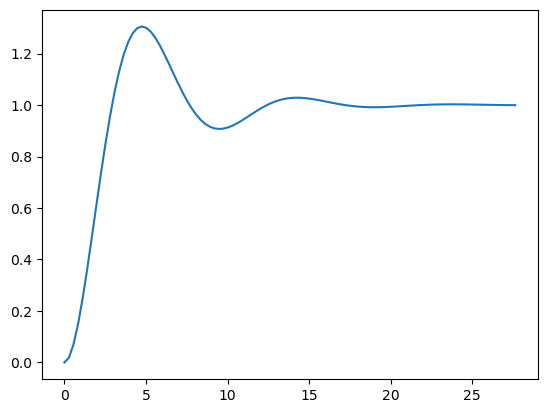

In [3]:
t,y = control.step_response(Gss)
plt.plot(t,y)

Obtención de la TF a partir del SS

In [4]:
G = control.ss2tf(Gss)
G

TransferFunction(array([-1.11022302e-16,  5.00000000e-01]), array([1. , 0.5, 0.5]))

C:\Users\POLI.RBASQUEZ\anaconda3\envs\SisDin\lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


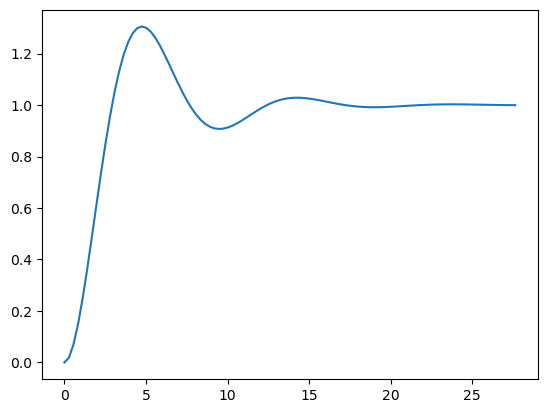

In [5]:
t,y = control.step_response(G)
plt.plot(t,y)

In [40]:
s = sym.symbols('s', complex=True)
R1 = 2000
R2 = 2000
R3 = 1000
R4 = 2000
R5 = 2000
C1 = 1E-6
C2 = 1E-6

Z1 = 1/(s*C1)
Z2 = 1/(s*C2)

A = ((Z1+R2)*R4)/(Z1*(R4+R5))
A = A.simplify()
B = (1/R1 + 1/(R2+Z1)+1/(R3+Z2))
B = B.simplify()
C = 1/(R3+Z2)
C = C.simplify()

In [41]:
X = (A*B - C)
G = ((1/R1)/X).simplify()
G

TransferFunction(array([1.e+06, 1.e+09]), array([4.0e+03, 1.5e+06, 5.0e+08]))

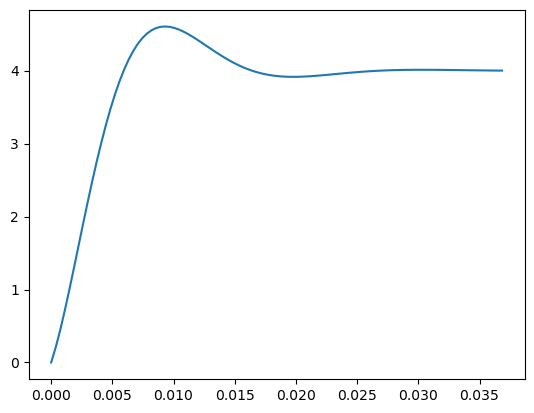

In [42]:
Gs = control.tf([1.0E6, 1000.0E6],[4000, 1.5E6, 500.0E6])
t,y = control.step_response(2*Gs)
plt.plot(t,y)
Gs